# Upscaling: Escalado (aumento de resolucion)
Upscaling es una tecnica que sirve para incrementar la resolucion en imagenes. Las tecnicas que explicamos en la clase de hoy sirven para procesos como **autoencoding** (lo vemos luego). Los GANs: Generative Adversarial Networks usan upscaling para mejorar resolucion. En cierto sentido el upscaling es el inverso del "pooling". El pooling lo veremos cuando estudiemos las CNN: Convolutional Neural Networks.

Que vamos ver hoy
* Nearest neighbor (el vecino mas cercano)
* interpolacion bilineal
* transposed convolution.

## Nearest Neighbor interpolation.
Voy a explicar esta tecnica con un ejemplo.

**Ejemplo 1.** (los cuatro pixeles) Comencemos con una imagen simple 4 pixeles de colores azul, violeta, verde y amarillo.  La idea es que esta imagen de 2x2 la podamos convertir a una imagen de 4x4.



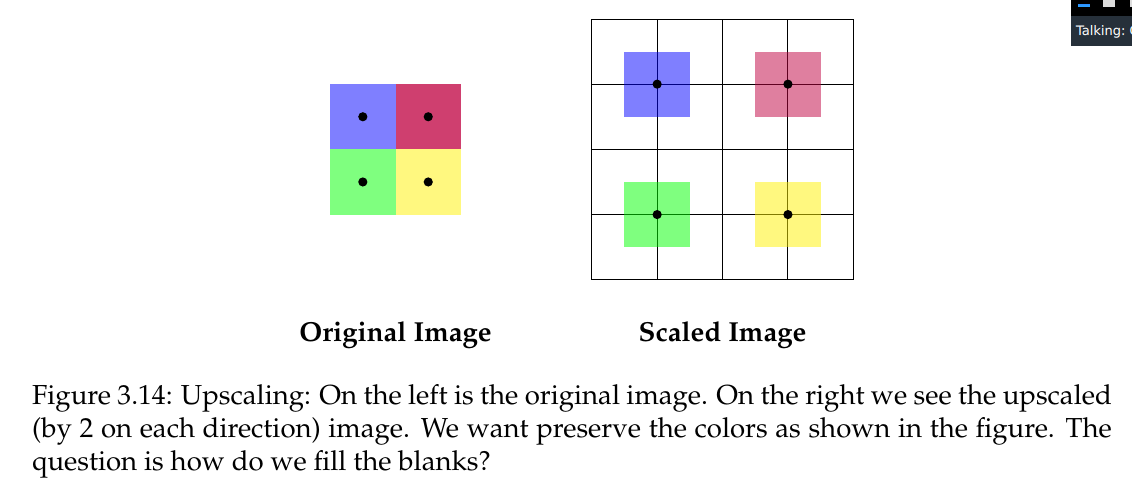

Como se escala una imagen espacialmente. Asumamos que la escala es $s$, entonces a aca punto de entrada  $(x,y)$ con una amplitud $A$ se le asigna un punto de salida $(sx, sy)$. Observemos la figura. El centro del cuadrado rojo a la izquierda tiene coordenadas $(1/2,1/2)$ que el factor de escala es $2$, entonces las coordenadas del punto de salida son $(1,1)$. Que es lo que observamos en la figura de la derecha. Que pasa con los colores? Hay que llenar los blancos. A cada nodo se le asigna un color. Hay cuatro nodos, el nodo en $(1,1)$ se le asigna el rojo, y asi con los otros 3. Se toma un punto de salida $(x_0, y_0)$ entonces se le asigna el color del nodo mas cercano.  

La figura de la interpolacion del vecino mas cercano es la siguiente.




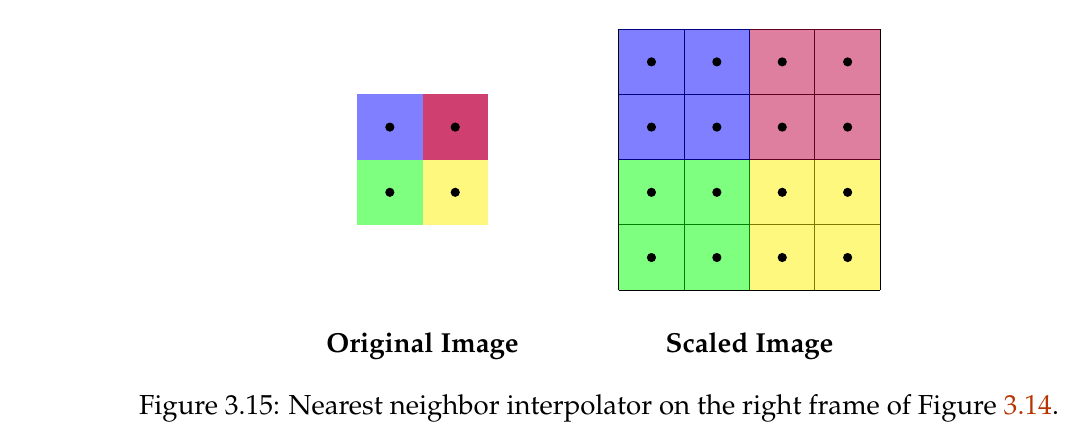

## Interpolacion bilineal.
Esta interpolacion (junto con la trilineal) es la interpolacion de Lagrange (pero para 2D).
La idea es hallar el valor en un coordenada $P=(x,y)$ dadas cuatro esquinas (en un rectangulo orientado con los ejes principales) determinado por los puntos $Q_1=(x_1,y_1), Q_2=(x_2, y_2), Q_3=(x_3, y_3),Q_4=(x_4,y_4)$

Basados en la siguiente grafica, describamos los puntos de nuevo.

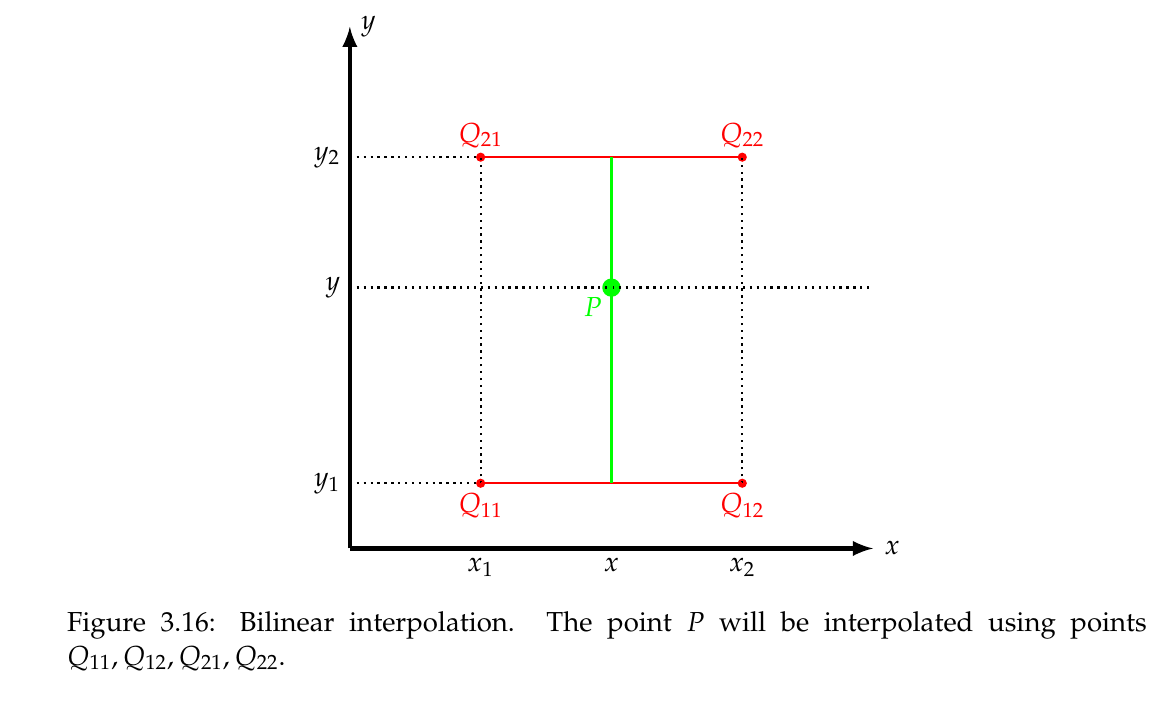

$$Q_{11}=(x_1,y_1), Q_{12}=(x_2, y_1), Q_{21}=(x_1, y_2) = Q_{22}= (x_2, y_2)$$,

Hipotesis: Se conoce la funcion a interpolar $f$ en las cuatro esquinas.
La interpolacion la vamos a hacer en 3 pasos:

1. Encontrar la amplitud (color) en el punto $(x, y_1)$.

$$f(x, y_1) = \frac{x_2 - x}{x_2 - x_1} f(Q_{11}) + \frac{x-x_1}{x_2 - x_1} f(Q_{12}) $$

2. Encontrar la amplitud (color) en el punto $(x, y_2)$.

$$f(x, y_2) = \frac{x_2 - x}{x_2 - x_1} f(Q_{21}) + \frac{x-x_1}{x_2 - x_1} f(Q_{22}) $$

3. Encontrar la amplitud (color) en el punto $(x, y)$.

$$f(x, y_2) = \frac{y_2 - y}{y_2 - y_1} f(x,y_1) + \frac{y-y_1}{y_2 - y_1} f(x, y_2) $$

Ojo: Desafortunadamente para un modelo tan simple como el que estamos analizando la interpolacion bilineal produce una imagen que no es tan parecida a la orginal, como si lo es la del vecino mas cercano.

A continuacion muestro el resultado de la interpolacion bilineal en el ejemplo ode los 4 pixeles.




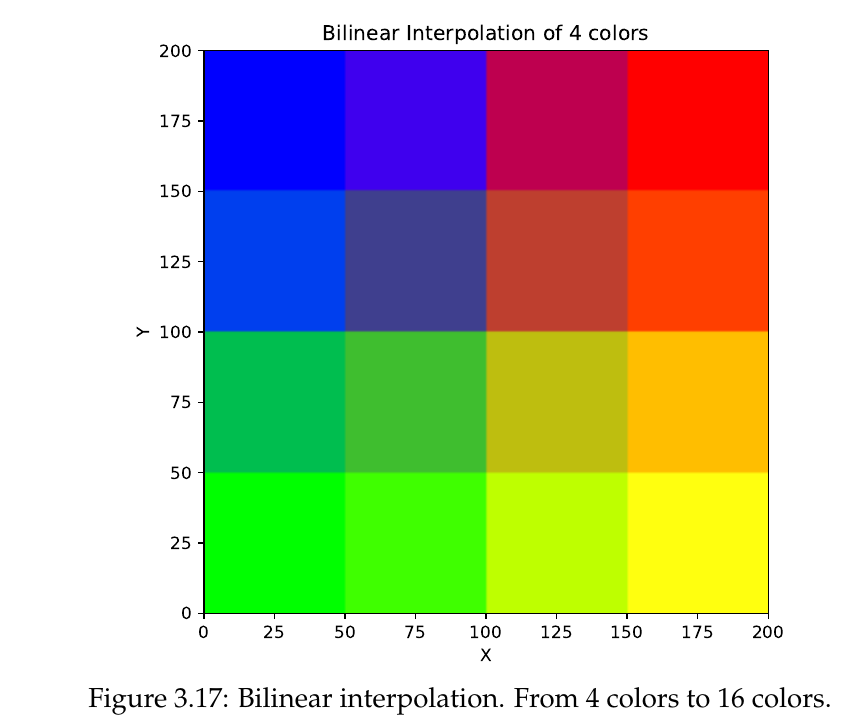

No es para desanimarnos. Cuando se tiene muchos pixeles (100 x 100) o mas, la interpolacion bilineal se comporta mejor, es mas suave y presenta menos pixelacion cuando se hace "zoom" (aumento).

Hay muchos formas de upscaling (mejoramiento de la resolucion)

* Nearest-Neighboar
* Bilinear interpolation
* Bicubic (trilineal)
* Lanczos interpolation
* Fourier Transform Interpolation

Hay metodos de upscaling basados en inteligencia artificial.
[ver este articulo](https://unimatrixz.com/topics/ai-upscaler/upscaling-methods/#classical-upscalers-vs-ai-upscalers-key-differences).

* ESRGAN: Enhanced Super-Resolution Generative Adversarial Networks.
* Stable Diffusion 4x
* SRCNN: Super-Resolution Convolutional Neural Network
* SRGAN: Super-Resolution Geneartive Adversarial Network
* Deep Image Prior Super-resolution Generative Adversarial Networks.






## Transposed Convolution: Convolucion transpuesta.

Ojoo: Muchos cientificos de computacion dicen que esto es **deconvolucion** y no es asi.  Me costo trabajo entender lo que voy a explicar, del nombre pero al fin creo que lo entendi.
No se encuentra facil en la internet informacion clara de por que se llama "transposed".

### Nota:
En el procesamiento de senhales se habla de convolucion
como si se tiene una senhal $I$ un filtro $f$ y la convolucion es $o$

$$o = I * f \tag{1} $$
Alli, se define el filtro inverso $f^{-1}$ que se encuentra por minimos cuadrados tal que

$$o * f^{-1} = I * (f * f^{-1}) $$
$$I = o * f^{-1}$$
Algebraicamente.  A esta operacion que nos permite hallar $I$ de la ecuacion (1) se le llama **deconvolucion**.

Sin embargo en esta clase vamos a ver lo que se llama convolucion transpuesta que es otra cosa muy distinta.

Otros nombres que se le dan a la convolucion transpuesta son: **Fractionally strided convolution**, o **up convolution**.

Una forma de entender el nombre **transposed convolution** es mostrando que la convolucion se puede ver como el producto de una matriz por un vector.

### Convolucion es el producto de una matriz por un vector.
Recordemos la definicion de convolucion

$$z_j = x_i * y_i = \sum_{i=0}^{N_y -1} y_i x_{i+j} \quad , \quad j=0,1, \cdots, N_x - N_y \tag{2} $$
donde $N_x$ es el numero de datos, $N_y$ es el numero de componentes del filtro.  Se puede hacer una analisis dimensional, pero no voy a hacer.

Como escribir (2) como el producto de una matriz por un vector.

Podemos ver que $Z = YX$ , explicitamente

$$ \begin{pmatrix}
y_0 & y_1 & \cdots & y_m & 0 &  \cdots & 0   \\
0   & y_0 & y_1 & \cdots & y_m & \ddots &  \vdots    \\
\vdots & \ddots & \ddots & \ddots & \ddots& \ddots & 0 \\
0 & \cdots & 0 & y_0 & y_1 & \cdots & y_m
\end{pmatrix}
\begin{pmatrix}
x_0 \\ x_1  \\ \vdots \\ x_n
\end{pmatrix} =
\begin{pmatrix}
z_0 \\
z_2 \\
\vdots \\
z_{N_x - N_y}
\end{pmatrix} $$
donde $m= N_y -1$, $n= N_x-1$.
A la matriz $Y$ se le llama
[Toeplitz](https://en.wikipedia.org/wiki/Toeplitz_matrix).






Que pasa con imagenes. Pues el ejemplo anterior era con senhales en una dimension. (un indice, vectores).

Recordemos la convolucion para tensores de rango 2 (matrices)

$$z_{jk} = (x * y)_{jk}  = \sum_{m=0}^{M_y - 1} \sum_{n=0}^{N_y -1} y_{mn} x_{m+j \, n + k} $$
$$j=0,1, \cdots, M_x - M_y \quad , \quad k=0,1, \cdots, N_x - N_y $$

Para simplificar vamos a asumir que $N_x = N_y$, $M_x = M_y$.
Matrices cuadradas.

Recordemos como hace la convolucion graficamente.


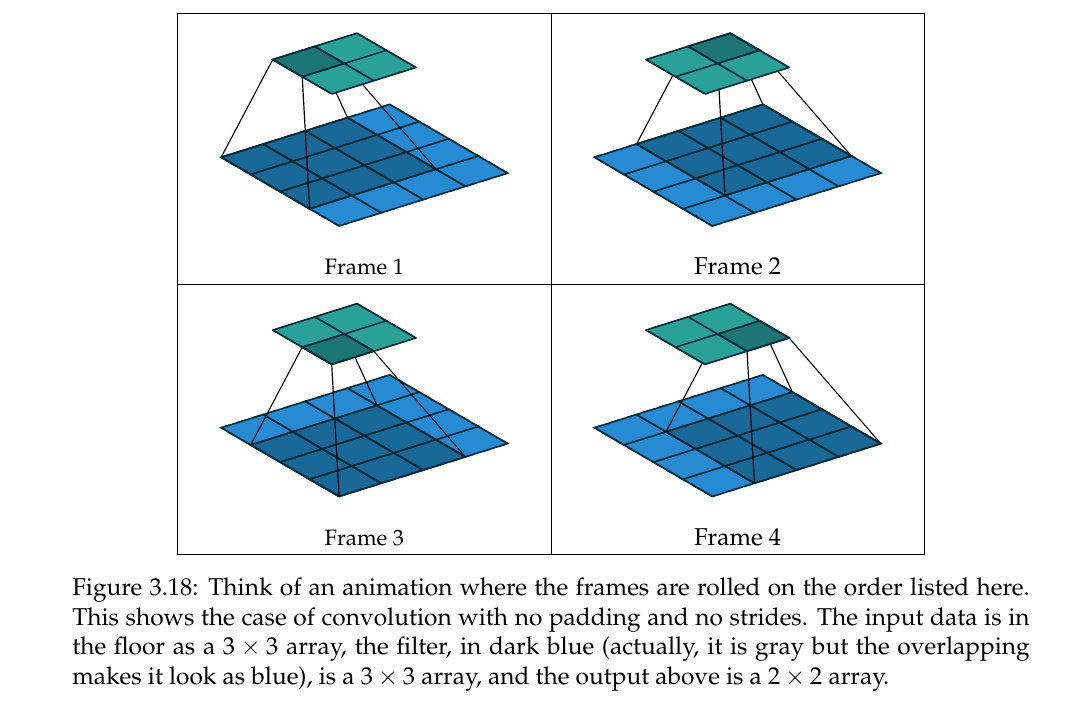

A parte de esta figura, vamos a comenzar con otra figura que representa lo mismo pero tiene diferente presentacion.

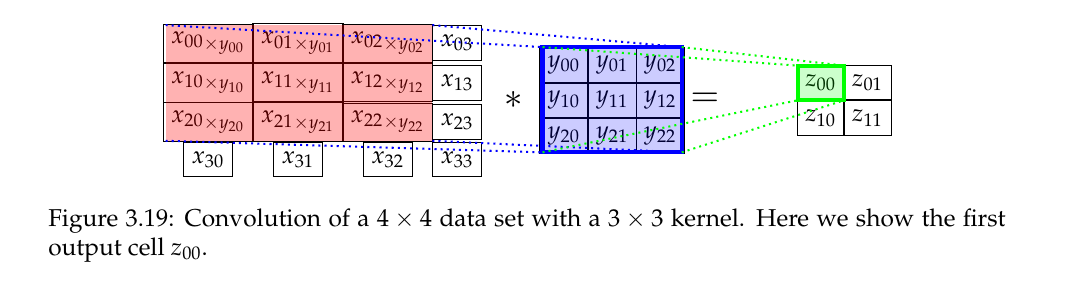

\begin{eqnarray}
z_{00} &=& x_{00} y_{00} + x_{01} y_{01} + x_{02} y_{02} + \\
        && x_{10} y_{10} + x_{11} y_{11} + x_{12} y_{12} + \\
        && x_{20} y_{20} + x_{21} y_{21} + x_{22} y_{22}
\end{eqnarray}


P odemos escribir esta ecuacion como
\begin{eqnarray}
z_{00} &=& x_{00} y_{00} + x_{01} y_{01} + x_{02} y_{02} +  x_{03} \times 0 \\
        && x_{10} y_{10} + x_{11} y_{11} + x_{12} y_{12} + x_{13} \times 0 \\
        && x_{20} y_{20} + x_{21} y_{21} + x_{22} y_{22} + x_{23} \times 0
\end{eqnarray}

Escribir la convolucion como una matriz por un vector cuando lo que vemos arriba es el producto de matrices no cuadra. Entonces vamos reducir el rango de $x,y$ (de 2 a 1).
En `Python` se usa `flatten`.

\begin{eqnarray}
x_{00} \to x_0 \quad x_{01} \to x_1  \quad x_{02} \to x_2 \to   x_{03} \to x_3 \\
x_{10} \to x_4 \quad x_{11} \to x_5  \quad  x_{12} \to x_6   \to x_{13} \to x_7 \\
x_{20} \to x_8 \quad x_{21} \to x_9  \quad x_{22} \to x_{10} \to x_{23} \to x_{11} \\
x_{30} \to x_{12} \quad x_{31} \to x_{13} \quad  x_{32} \to x_{14} \to x_{33} \to x_{15} \\
\end{eqnarray}

La formula general para este proceso (flatten) es

$$x_{ij}  \to x_{i \times N_x + j} $$
$i=0,1, \cdots, N_x-1$, $j=0,1, \cdots, N_x-1$. En el ejemplo $N_x=4$

Luego de hacer ese "mapping"  tenemos, para la primera componente de salida $z_0$

\begin{eqnarray}
z_0 &=& x_0 y_0 + x_1 y_1 + x_2 y_2 + x_3 \times 0  \\
&+& x_4 y_3 + x_5 y_4 + x_6 y_5 + x_7 \times 0  \\
&+& x_8 y_6 + x_9 y_7 + x_{10} y_8 + x_{11} \times 0 \\
&+& x_{12} \times 0 + x_{13} \times 0 + x_{14} \times 0 + x_{15} \times 0  
\end{eqnarray}

El $z_0$ lo podemos escribir como un producto interno (punto) de
los vectores siguientes.


$$y = ( y_0, y_1, y_2, 0, y_3, y_4, y_5, 0, y_6, y_7, y_8, 0, 0, 0, 0, 0) $$
y
$$x= \begin{pmatrix} x_0 \\ x_1 \\ \vdots \\ x_{15} \end{pmatrix}  $$

Vamos para $z_{01}$. Arrancamos con la grafica.



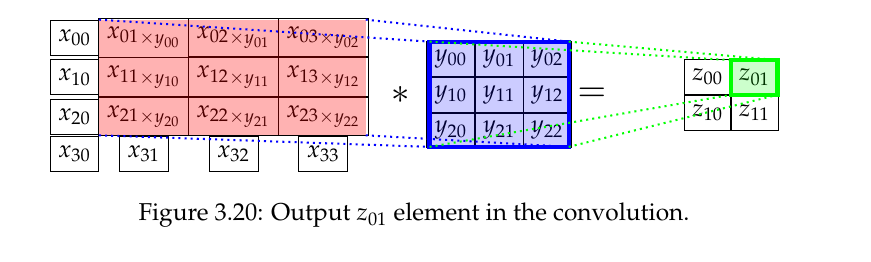

\begin{eqnarray}
z_{01} &=& x_{00} \times 0 + x_{01} y_{00} + x_{02} y_{01} + x_{03} y_{02}  \\
&=& x_{10} \times 0 + x_{11} y_{10} + x_{12} y_{11} + x_{13} y_{12} \\
&+&  x_{20} \times 0 + x_{21} y_{20} + x_{22} y_{21} + x_{23} y_{22} \\
&+& x_{30} \times 0 + x_{31} \times 0 + x_{32} \times 0 + x_{33} \times 0
\end{eqnarray}
Hacemos el mapeo (flatten) de rango 2 a rango 1.

\begin{eqnarray}
z_{1} &=& x_{0} \times 0 + x_{1} y_{0} + x_{2} y_{1} + x_{3} y_{2}  \\
&=& x_{4} \times 0 + x_{5} y_{3} + x_{6} y_{4} + x_{7} y_{5} \\
&+&  x_{8} \times 0 + x_{9} y_{6} + x_{10} y_{7} + x_{11} y_{8} \\
&+& x_{12} \times 0 + x_{13} \times 0 + x_{14} \times 0 + x_{15} \times 0
\end{eqnarray}

La componente de salida $z_1$ se puede escribir como el producto de los vectores

$$y = (0 \quad  y_0\quad  y_1\quad  y_2 \quad 0 \quad y_3 \quad y_4\quad  y_5\quad  0\quad  y_6\quad  y_7\quad   y_8 \quad 0 \quad 0 \quad 0 \quad 0) $$
y
$$x = \begin{pmatrix} x_0 \\ x_1 \\ \vdots \\ x_{15}\end{pmatrix}  $$

8:00 pm

Por ultimo calculamos $z_{10}$


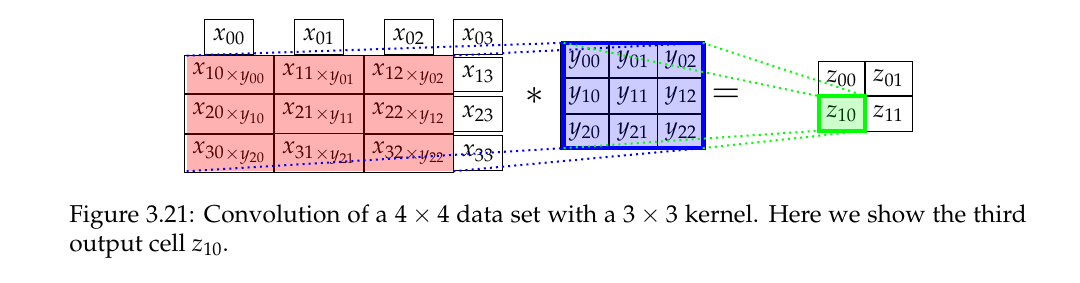

El patron es el siguiente
$z_{10}$ corresponde el al producto interno de los dos vectores siguientes

$$ y = ( 0 \; 0 \; 0 \; 0 \; y_0 \; y_1 \; y_2 \; 0 \; y_3 \; y_4 \; y_5 \; y_6 \; y_7 \; y_8 \; 0  $$


$$x = \begin{pmatrix} x_0 \\ x_1 \\ \vdots \\ x_{15}\end{pmatrix}  $$

Podemos construir el producto de la matriz y el vector que producen $z$

\begin{eqnarray}
  \begin{pmatrix}
    z_0 \\
    z_1 \\
    z_2 \\
    z_3
  \end{pmatrix}
  = \begin{pmatrix}
   y_0 & y_1 & y_2 & 0 & y_3 & y_4 & y_5 & 0 & y_6 & y_7 & y_8 & 0 & 0 & 0  & 0 & 0 \\
   0  & y_0 & y_1 & y_2 & 0 & y_3 & y_4 & y_5 & 0 & y_6 & y_7 & y_8 & 0  & 0  & 0 & 0 \\
   0  & 0 & 0 & 0 & y_0 & y_1 & y_2 & 0 & y_3 & y_4 & y_5 & 0 & y_6  & y_7  & y_8 & 0 \\
   0  & 0 & 0 & 0 & 0 & y_0 & y_1 & y_2 & 0 & y_3 & y_4 & y_5 & 0  & y_6  & y_7 & y_8 \\
  \end{pmatrix}
  \begin{pmatrix}
    x_0 \\
    x_1 \\
    \vdots \\
    x_{15}
  \end{pmatrix}
  \nonumber \\
\end{eqnarray}



El patron es claro, en palabras y algebra.

* De la primera fila escribimos $y_0, y_1, \cdots, y_{Ny-1}$, y luego $N_x - N_y$ ceros, despues $y_{N_y} \cdots, y_{2 N_y-1}$ y $N_x - N_y$ ceros y asi hasta la ultima fila de $y$. Es decir
$$y_{M_y-1 \; N_y} \cdots y_{M_y N_y-1} $$ y $N_x - N_y$ ceros.
luego 0 por el resto de las filas vacias de datos. Tantos ceros como celdas "blancas". Es decir, $(M_x - M_y)(N_x - N_y)$ ceros.

* Si el filtro se mueve a la derecha  movemos la proxima fila por un lugoar, y reemplazamos con un 0 la primera columna, y si nos desplazamos una vez mas, entonces 0 en las dos primeras columnas y asi. Si nos movemos hacia abajo, dejamos una fila de 0 encima, y si nos movemos otra vez hacia abajo dejamos , ya dos filas de ceros y asi.

### Convolucion transpuesta.

Si la convolucion se define, matricialmente como
$$Z= XY \tag{4} $$
donde
$X,Z$ son de rango 1 (por que se vectorizaron, flatten) y $Y$ es un tensor de rango 2 (matriz).

Entonces

$$X = Y^T  Z \tag{5} $$
Ojooooo, este $X$ no es el mismo $X$ de arriba. Simplemente se puede ver que $X$ tiene las dimensiones deseadas que son aquellas nuevas. Explico.

La convolucion convierte una matriz $M_x \times M_y$ por una matriz mas pequenha $O_x \times O_y$. La deconvolucion debe hacer lo contrario. Convertir la matriz de tamanho $O_x \times O_y$ en una matriz **mas grande** (de aca la palabra upscaling) de tamanho $M_x \times M_y$.

Hagamos una analisis dimensional de el producto matricial
$Z = XY$
Aca $X \in \mathbb{R}^{m \times n}$, $Y \in \mathbb{R}^n$
y $Z \in \mathbb{R}^m$ donde $m \ll n$

Ahora miremos la eucaion (5). Nos devolmenos de $Z$ hacia $X$,
La dimension crece por que vamos de $m$ a $n$.

A la ecuacion (5) es la que se llama, convolucion transpuesta. Veamos esto en una ecuacion.

\begin{eqnarray}
  \begin{pmatrix}
    x_0 \\
    x_1 \\
    \vdots \\
    x_{15}
  \end{pmatrix}
  =
  \begin{pmatrix}
    y_0 & 0 & 0 & 0 \\
    y_1 & y_0 & 0 & 0 \\
    y_2 & y_1 & 0 & 0 \\
    0 & y_2 & 0 & 0 \\
    y_3 & 0  & y_0 & 0 \\
    y_4 & y_3  & y_1 & y_0 \\
    y_5 & y_4  & y_2 & y_1 \\
    0 & y_5  & 0 & y_2 \\
    y_6 & 0  & y_3 & 0 \\
    y_7 & y_6  & y_4 & y_3 \\
    y_8 & y_7  & y_5 & y_4 \\
    0  & y_8  & 0 & y_5 \\
    0  & 0  & y_6 & 0 \\
    0  & 0  & y_7 & y_6 \\
    0  & 0  & y_8 & y_7 \\
    0  & 0  & 0 & y_8 \\
  \end{pmatrix}
  \begin{pmatrix}
    z_0 \\
    z_1 \\
    z_2 \\
    z_3
  \end{pmatrix}.
  \tag{6}
\end{eqnarray}




El $X$ obtenido en la conolucion transpuesta no es el mismo con que arrancamos pues $Y^T$ no es la inversa, no es $Y^{-1}$. Lo que pasa es que las dimensiones cuadran.

La pregunta ahora es esto como se implementa en la practica.
Voy a mostrar que la convolucion transpuesta es simplemente otra convolucion y cual otra.

Tenemos que hacer el "reshape".

$$x= \begin{pmatrix}
x_{00} &  x_{01} & x_{02} & x_{03} \\
x_{10} &  x_{11} & x_{12} & x_{13} \\
x_{20} &  x_{21} & x_{22} & x_{23} \\
x_{30} &  x_{31} & x_{32} & x_{33} \\
\end{pmatrix} \quad , \quad y =
\begin{pmatrix}
y_{00} & y_{01} & y_{02} \\
y_{10} & y_{11} & y_{12} \\
y_{20} & y_{21} & y_{22} \\
\end{pmatrix}
\quad, \quad
z =
\begin{pmatrix}
z_{00} & z_{01} \\
z_{10} & z_{11}
\end{pmatrix}  $$

En la convolucion inversa el filtro va de derecha a izquierda (al reves). Es decir,

$$ y = \begin{pmatrix}
y_{22} & y_{21} & y_{20} \\
y_{12} & y_{11} & y_{10} \\
y_{02} & y_{01} & y_{00} \\
\end{pmatrix} $$

El primer elemento de  (6)

$$x_{00} = z_{00} y_{00} + z_{01} 0 + z_{11} 0  $$
Veamos como se logra este producto de forma grafica.



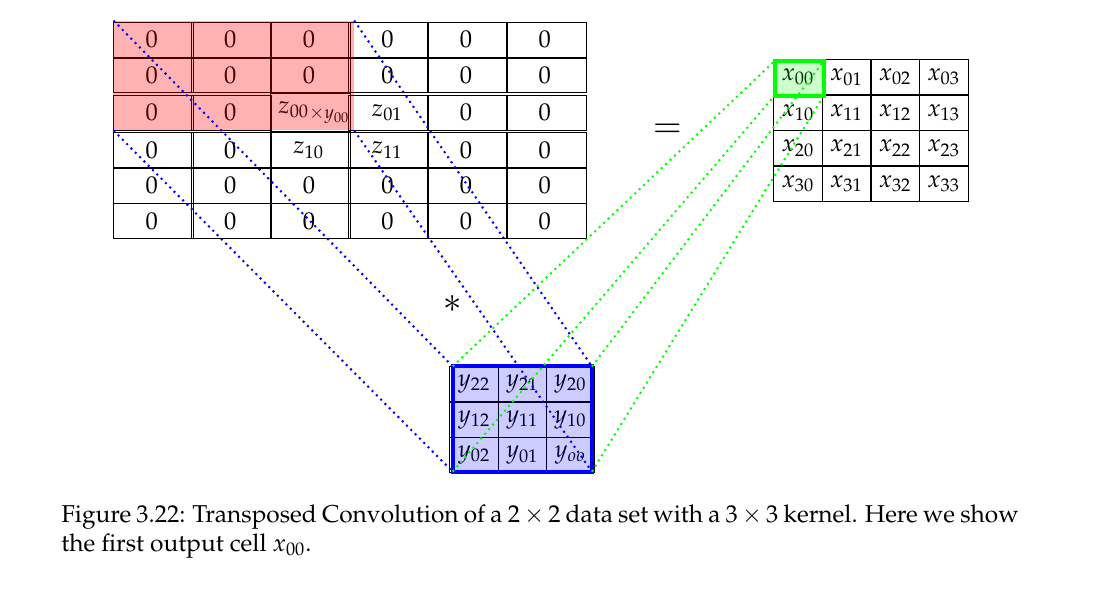

Otra grafica mas. La 5ta fila del producto transpuesto es
$$ y_4 z_0 + y_3 z_1 + y_1 z_2 + y_0 z_3$$
$$ y_{11} z_{00} + y_{10} z_{01} + y_{01} z_{10} + y_{00} z_{11}$$



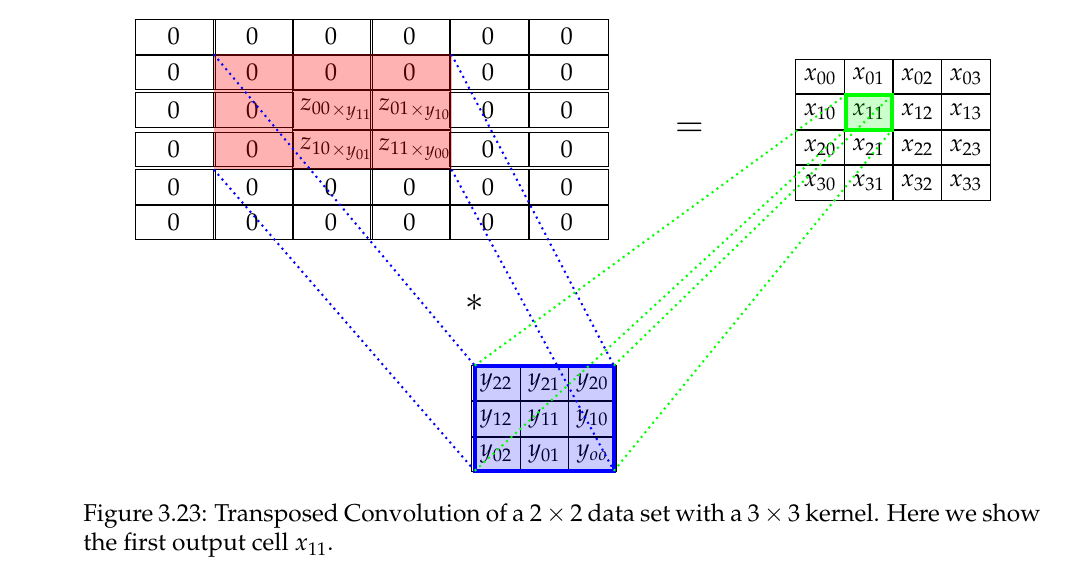

En conclusion:
Para hacer la convolucion transpuesta, se hace una convolucion directa (usual) pero ojo.

* La imagen (matriz) $z$ se le hace un padding. En el ejemplo es 2, pero si consideramos un ejemplo general, ya no es 2, entonces cuanto?

* una vez el padding se hace la convolucion pero con el filtro $y$ "patasarriviado" (lo de la derecha a la izquierda y lo de arriba ajano. Como se ve en la figura 3.23.

Falta averiguar cual es el padding?

La idea es que la convolucion normalmente (no stridding) con padding se cuenta (el numero de salidas) como (recuerden que $z$ y $x$ intercambian roles)

$$ (M_z - M_y + 2p + 1) \times (N_z - N_y + 2p + 1) $$

Para hallar el padding resolvemos esta ecuacion (en este ejemplo es 4

$$M_z - M_y + 2p + 1 =  4$$
Pero $M_z=2$, $M_y=3$

Entonces

$$2 - 3 + 2p + 1 = 4 $$
$$2p  = 4 $$
$p=2$

La ecuacion general para el padding sera:

$$M_z - M_y + 2p + 1 =  M_x$$
De aca que el padding en general es

$$2p = M_x + M_y - M_z - 1 $$
$$p =\frac{ M_x + M_y - M_z - 1}{2} $$



# Proxima clase. El gradiente y los aceleradores.